<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [9]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


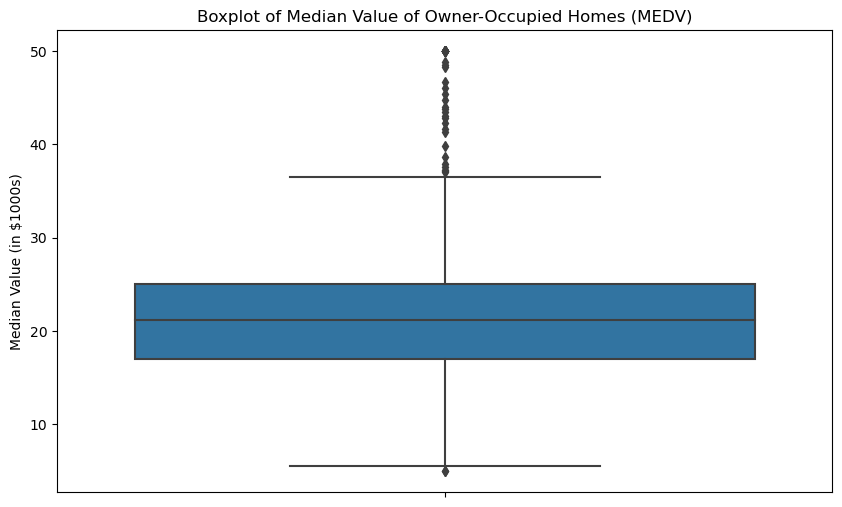

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value (in $1000s)')
plt.show()

median is at $21000

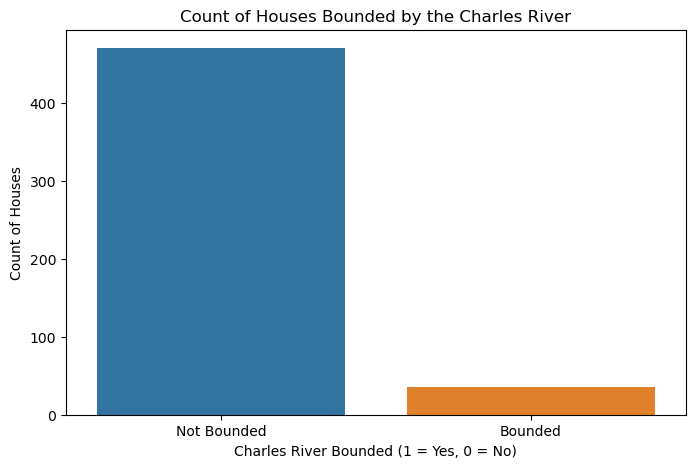

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Count of Houses Bounded by the Charles River')
plt.xlabel('Charles River Bounded (1 = Yes, 0 = No)')
plt.ylabel('Count of Houses')
plt.xticks([0, 1], ['Not Bounded', 'Bounded'])
plt.show()

there is a greater number of houses not bounded than bounded by the charles river

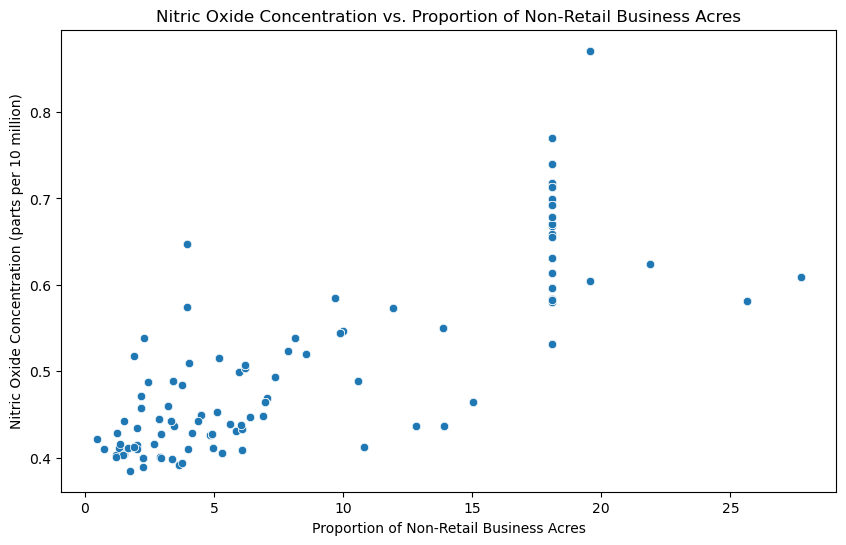

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Nitric Oxide Concentration vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres')
plt.ylabel('Nitric Oxide Concentration (parts per 10 million)')
plt.show()

increasing proportion

In [15]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 0.35, 0.7, 1], labels=['35 and Younger', '35-70', '70 and Older'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', data=boston_df)
plt.title('Median Value of Homes (MEDV) by Age Group of Owner-Occupied Units')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000s)')
plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 1000x600 with 0 Axes>

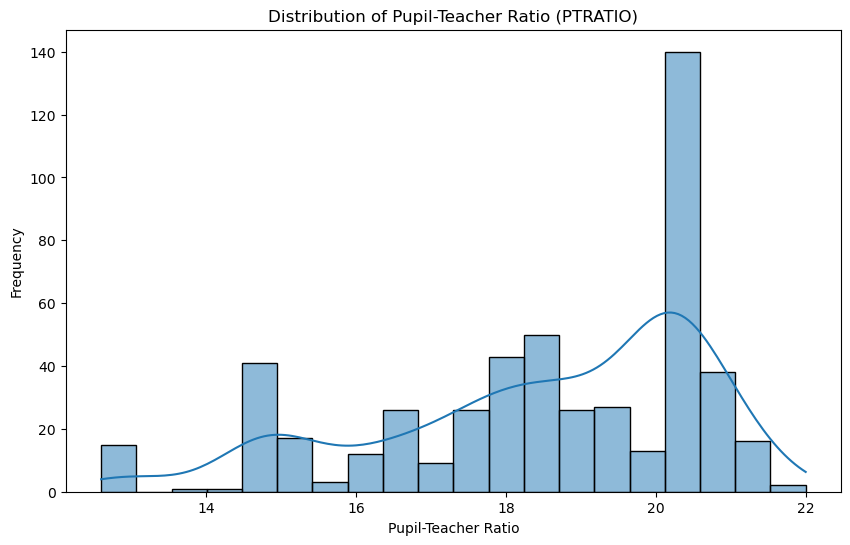

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Distribution of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

20.5 is the mode of teacher-pupil ratio

In [16]:

bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = stats.ttest_ind(bounded, not_bounded)

alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis."
else:
    conclusion = "Fail to reject the null hypothesis."

In [23]:
f_stat, p_value = stats.f_oneway(boston_df[boston_df['AGE_GROUP'] == '35 and Younger']['MEDV'],
                                  boston_df[boston_df['AGE_GROUP'] == '35-70']['MEDV'],
                                  boston_df[boston_df['AGE_GROUP'] == '70 and Older']['MEDV'])

/Users/leahvarghese/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [ ]:
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

In [25]:
import statsmodels.api as sm

X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()